In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

import math
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn import neighbors
from sklearn.model_selection import cross_val_score

%matplotlib inline

# prepare data for multivariate regression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

In [3]:
data.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [4]:
# drop top 3 rows and bottom 3 rows
data.drop([0, 1, 2, 352, 353, 354], axis=0, inplace=True )

In [5]:
data.columns = data.loc[3,:]

In [6]:
data.drop([3], axis=0, inplace=True)

In [7]:
data.set_index('City', inplace=True)

In [8]:
data.head()

3,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [9]:
data.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object', name=3)

In [10]:
data_reg = data[['Population', 'Murder and\nnonnegligent\nmanslaughter','Robbery','Property\ncrime','Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft']]

In [11]:
data_reg['Murder'] = data_reg['Murder and\nnonnegligent\nmanslaughter']
data_reg['Larceny'] = data_reg['Larceny-\ntheft']
data_reg['Auto'] = data_reg['Motor\nvehicle\ntheft']
data_reg['Property'] = data_reg['Property\ncrime']

/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [12]:
data_reg.drop(['Murder and\nnonnegligent\nmanslaughter','Property\ncrime','Larceny-\ntheft','Motor\nvehicle\ntheft'], axis=1, inplace=True)

/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
data_reg.head()

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property
City,,,,,,,
Adams Village,"1,861",0,2,0,10,0,12
Addison Town and Village,"2,577",0,3,0,20,1,24
Akron Village,"2,846",0,1,0,15,0,16
Albany,"97,956",227,705,8,"3,243",142,"4,090"
Albion Village,"6,388",4,53,0,165,5,223


In [14]:
data_reg2 = (data_reg.applymap(lambda s: s.replace(',',''))).copy().astype(int)

In [15]:
data_reg2['Murder_b'] = data_reg2['Murder'].apply(lambda x: 1 if x>0 else 0)

In [16]:
data_reg2['Robbery_b'] = data_reg2['Robbery'].apply(lambda x: 1 if x>0 else 0)

In [17]:
data_reg2['Population2'] = data_reg2['Population'].pow(2)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text xticklabel objects>)

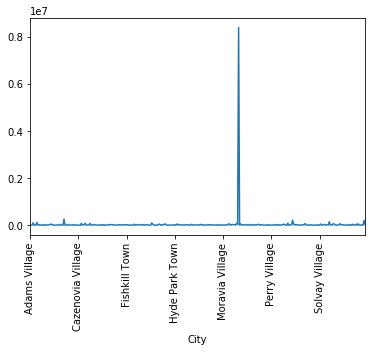

In [18]:
data_reg2['Population'].plot()
plt.xticks(rotation=90)

In [19]:
idx = np.where(data_reg2['Population']>0.5*1e7)

In [20]:
# outliers
data_reg2.iloc[list(idx[0]),:]

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property,Murder_b,Robbery_b,Population2
City,,,,,,,,,,
New York,8396126,19170,16606,335,117931,7434,141971,1,1,70494931807876


In [21]:
# remove outliers
data_reg2.drop(['New York'], axis=0, inplace=True)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text xticklabel objects>)

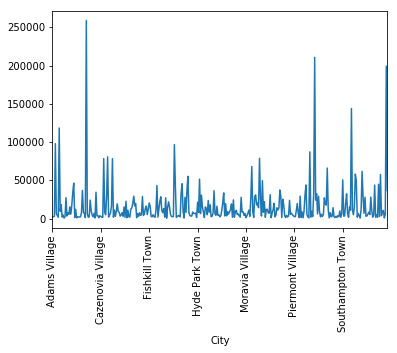

In [22]:
data_reg2['Population'].plot()
plt.xticks(rotation=90)

In [23]:
data_reg2.head()

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property,Murder_b,Robbery_b,Population2
City,,,,,,,,,,
Adams Village,1861,0,2,0,10,0,12,0,0,3463321
Addison Town and Village,2577,0,3,0,20,1,24,0,0,6640929
Akron Village,2846,0,1,0,15,0,16,0,0,8099716
Albany,97956,227,705,8,3243,142,4090,1,1,9595377936
Albion Village,6388,4,53,0,165,5,223,0,1,40806544


# OLS regression

In [24]:
# run regression above using statsmodels 
linear_formula = 'Property ~ Population+Murder'
ols_test = smf.ols(formula=linear_formula, data=data_reg2)
lm = ols_test.fit()

In [25]:
lm.params

Intercept      12.966134
Population      0.017278
Murder        160.436198
dtype: float64

In [26]:
lm.pvalues

Intercept     4.821380e-01
Population    8.710103e-62
Murder        1.182654e-83
dtype: float64

In [27]:
lm.conf_int()

,0,1
Intercept,-23.278503,49.210770
Population,0.015624,0.018931
Murder,148.355142,172.517254


In [28]:
lm.rsquared

0.92867764540006936

In [29]:
lm.rsquared_adj

0.92826298054774414

In [30]:
regr = linear_model.LinearRegression()
regr.fit(data_reg2[['Population','Murder']], data_reg2['Property'])

# Display the R2
print('R2: \n', regr.score(data_reg2[['Population','Murder']], data_reg2['Property']))

R2: 
 0.9286776454


# KNN regression vs OLS regression

In [31]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)

In [32]:
X = np.array(data_reg2[['Population','Murder']])
Y = np.array(data_reg2[['Property']])

In [33]:
score_knn = cross_val_score(knn, X, Y, cv=5)
print("KNN accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2 ))
score_ols = cross_val_score(regr, X, Y, cv=5)
print("OLS accuracy: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2 ))

KNN accuracy: 0.62 (+/- 0.18)
OLS accuracy: 0.76 (+/- 0.42)


In [34]:
X1 = np.array(data_reg2[['Population']])
Y1 = np.array(data_reg2[['Property']])

In [35]:
regr.fit(X1,Y1)
knn.fit(X1,Y1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [36]:
Y_ols = regr.predict(X1)
Y_knn = knn.predict(X1)

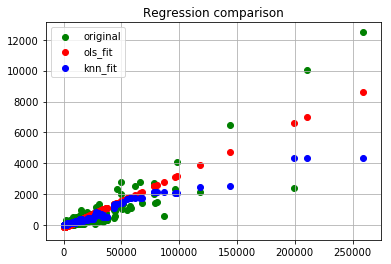

In [37]:
plt.scatter(X1, Y1, color='g', label='original')
plt.scatter(X1, Y_ols, color='r', label='ols_fit')
plt.scatter(X1, Y_knn, color='b', label='knn_fit')
plt.title('Regression comparison')
plt.grid(b='on')
plt.legend(loc='best')
plt.show()

# Some thoughts 
1. I don't know that I prefer one over the other. 
2. OLS seems to have better accuracy average when using cross validation, but the confidence interval is broader
3. OLS is simpler (if we think in terms of parameters used 1-2, versus 10 neighbors or 5 neighbors)
4. For the version with 1 explanatory varaible the two fits are quite close to one another geometrically, but the KNN is more nuanced (in some sense more complex)
5. KNN should work better on data with more complex geometry and on data where no serious outliers are present  
6. OLS should work better to capture simple features
7. I think KNN would probably not be a good idea if one of the explanatory variables were categorical, unless you had a really good nuanced enough metric on those categorical variables. 
8. If I really had to pick, I would pick OLS because it is simpler and has better accuracy (for this problem).